In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('casos-brasil.csv')
df['data'] = pd.to_datetime(df['data'])
df['data'] = pd.to_datetime(df.data).dt.date
df.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
3957,31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
3958,31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
3960,31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
3961,31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


In [4]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


# Decompose time series

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [6]:
resultados = seasonal_decompose(df_sp.novosObitos, period=7)
resultados

In [7]:
df_sp.index = pd.to_datetime(df_sp.data)

In [8]:
def plot_graph(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20, 7))
    plt.plot(y1,color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=18)

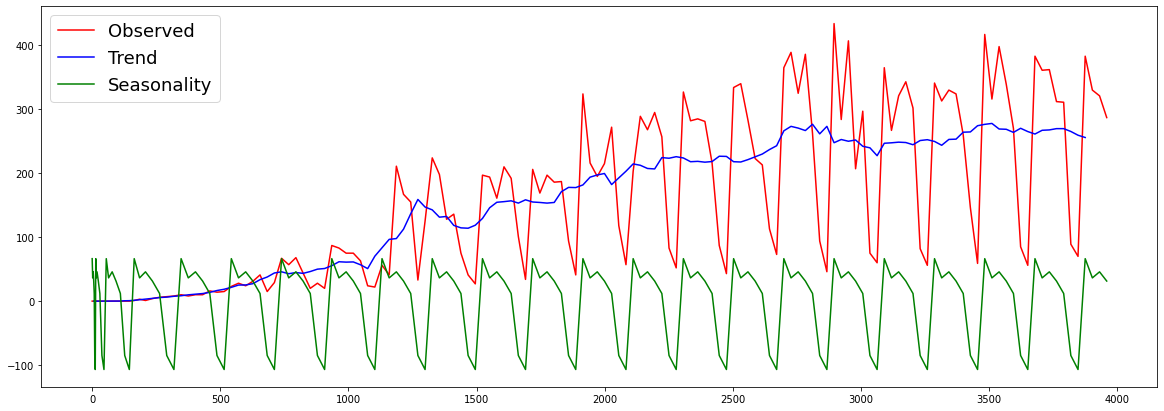

In [9]:
plot_graph(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green',
      'Observed','Trend','Seasonality')

In [10]:
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']

In [11]:
resultados_rj = seasonal_decompose(df_rj.novosObitos, period=7)
resultados_mg = seasonal_decompose(df_mg.novosObitos, period=7)

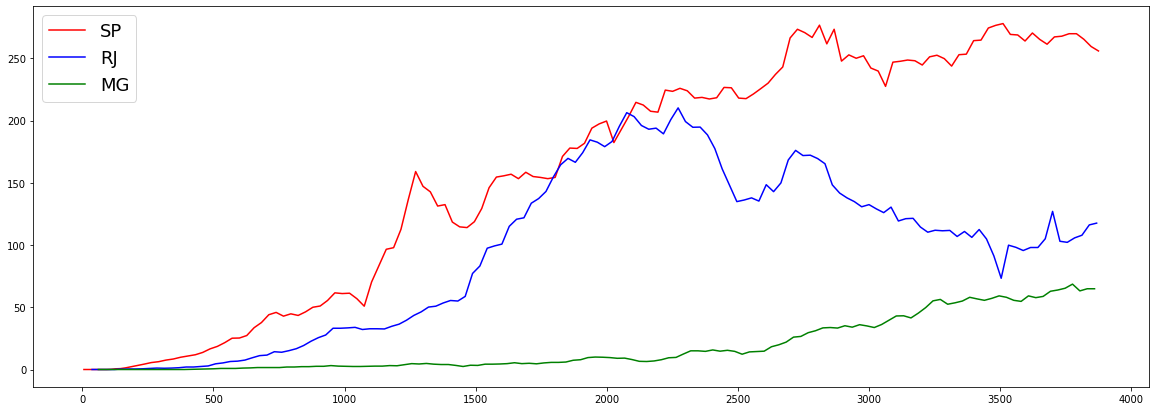

In [12]:
plot_graph(resultados.trend, resultados_rj.trend, resultados_mg.trend, 'red', 'blue', 'green',
      'SP', 'RJ', 'MG')

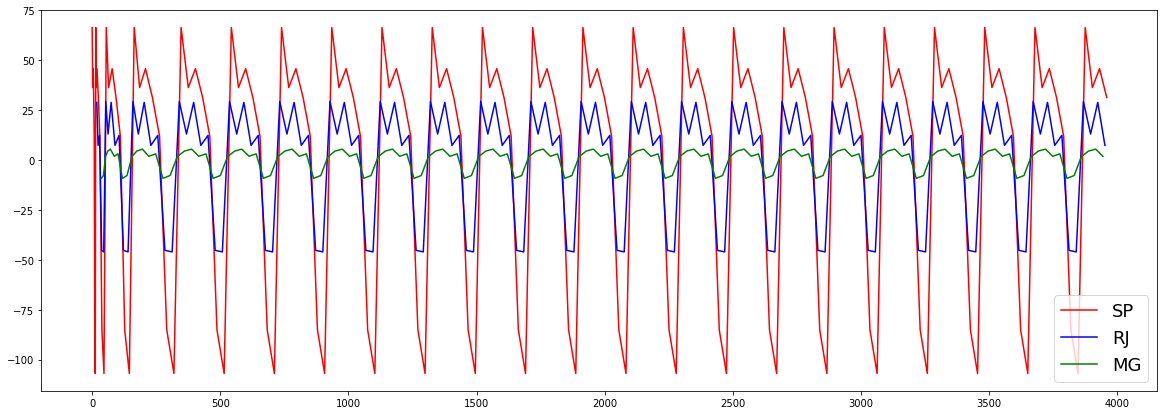

In [13]:
plot_graph(resultados.seasonal, resultados_rj.seasonal,resultados_mg.seasonal, 'red','blue','green',
      'SP','RJ','MG')

In [14]:
y = df_sp['Casos']
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

# Check if te time series is stationary 

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

[Read more](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)

In [16]:
from statsmodels.tsa.stattools import adfuller
adfuller(y.dropna())

(1.3664743612803476,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 2627.7242380318335)

In [17]:
print('p-valor:',adfuller(y.dropna())[1])

p-valor: 0.9969563888815705


This series is not stationary because p-value is larger than 0.05. We can notice this in the figures above

Now let's plot the autocorrelation and the partial autocorrelation (ACF - autocorrelation function)

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [25]:
def plotACF(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2,title='1st Differentiation')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3,title='2nd Differentiation')

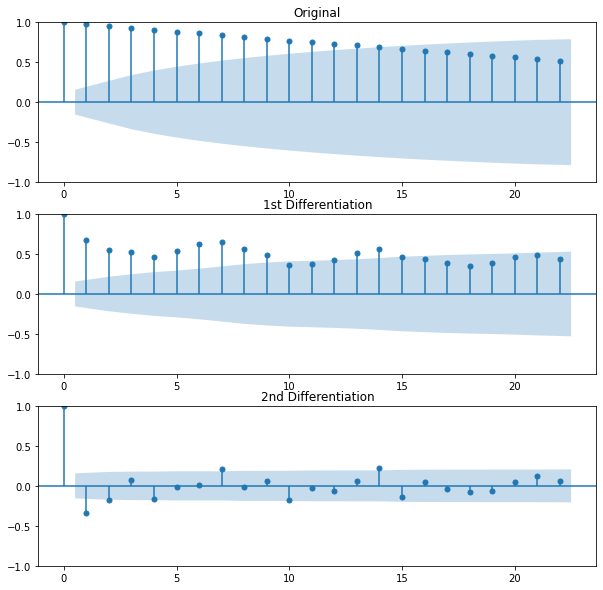

In [26]:
plotACF(y, y.diff().dropna(), y.diff().diff().dropna())

In the first differentiation, we can see some variation caused by the seasonality

In the second differentiation, we have a negative autocorrelation. It can indicate that we made  many differentiations

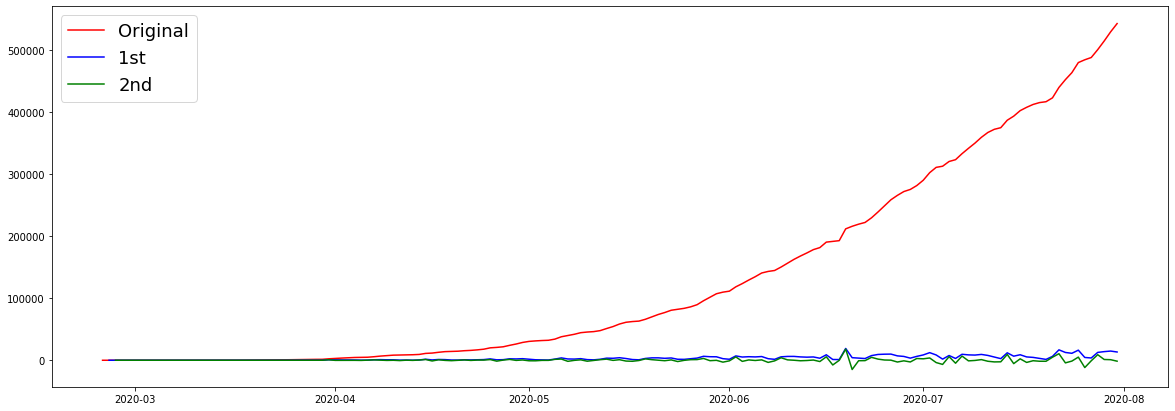

In [27]:
plot_graph(y,y.diff(),y.diff().diff(),'red','blue','green','Original','1st','2nd')

There is not much difference between the first and second differentiation. This can indicate that we have done a lot of differentiations

There are several algorithms to be able to predict a time series. We haven't talked about them yet, but there is a series. It has the autoregressive, it has the moving average, MA and AR. In general, we are going to use one that is a combination of these parameters, ARIMA.

ARIMA is exactly an acronym for this junction of AR, the autoregressive, the MA, the moving average, and we have the i, which is exactly the degree of differentiation. Defining whether I will differentiate once or twice will impact the parameters I will determine for my model.

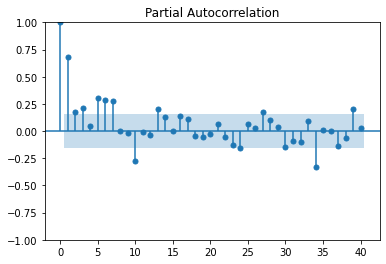

In [28]:
plot_pacf(y.diff().dropna(),lags=40);

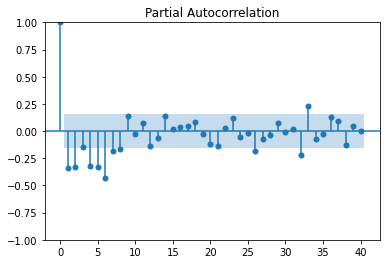

In [29]:
plot_pacf(y.diff().diff().dropna(),lags=40);

With just one differentiation is better than two. So, we will use just one differentiation

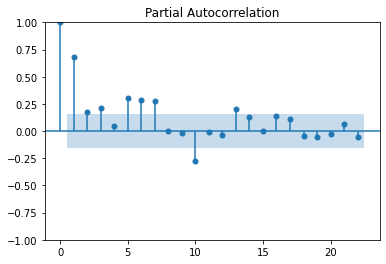

In [30]:
plot_pacf(y.diff().dropna());

# ARIMA (p, d=1, q=1)
d is the degree of the differentiation
q is the degree of the moving average (residues) -> Considering just one for simplification

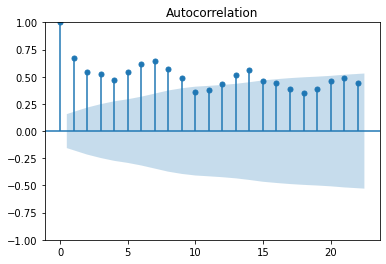

In [31]:
plot_acf(y.diff().dropna());

We have a lot of lags above the significance curve. But the ARIME module is not so good when we have seasonality. So it is better to use the model ARIMA seasonal.

Put more differentiation won't help because theses variations are caused by the  seasonality

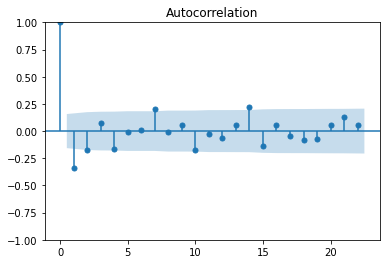

In [32]:
plot_acf(y.diff().diff().dropna());

- p is the number of autoregressive terms,
- d is the number of nonseasonal differences needed for stationarity, and
- q is the number of lagged forecast errors in the prediction equation.

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
model = ARIMA(y,order=(1,1,1)) # p=1, d=1, q=1 (simple model before add complexity) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Casos   No. Observations:                  158
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1456.914
Date:                Wed, 15 Jun 2022   AIC                           2919.828
Time:                        10:28:46   BIC                           2928.997
Sample:                    02-25-2020   HQIC                          2923.552
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    182.326      0.000       0.989       1.011
ma.L1         -0.8471      0.035    -24.156      0.000      -0.916      -0.778
sigma2      6.672e+06   2.04e-09   3.28e+15      0.0

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Search for good hyperparameters

In [46]:
import itertools 
p = d= q = range(0,2)
pdq = list(itertools.product(p, d, q)) # all the combinations

In [47]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))] # 7 because the seasonality

In [50]:
print('Parameter combination example for Seasonal ARIMA:')
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[2]))

Parameter combination example for Seasonal ARIMA:
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [51]:
y = df_sp['Casos']
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

# Testing for the combination of pdq and seasonal_pdq

In [52]:
import statsmodels.api as sm
aic_lista = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(
            y,
           order=param,
           seasonal_order=param_seasonal
        )
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36399D+01    |proj g|=  3.55272D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.553D-10   1.364D+01
  F =   13.639887542360468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr


At iterate   15    f=  9.96238D+00    |proj g|=  4.69059D-04

At iterate   20    f=  9.95898D+00    |proj g|=  1.97042D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     24      1     0     0   5.692D-06   9.954D+00
  F =   9.9539441669252824     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20048D+01    |proj g|=  2.55953D+01

At iterate    5    f=  1.02044D+01    |proj g|=  2.10390D-01

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11434D+01    |proj g|=  7.20683D-01

At iterate    5    f=  1.08736D+01    |proj g|=  2.11923D-03

At iterate   10    f=  1.08733D+01    |proj g|=  2.55543D-05

At iterate   15    f=  1.08733D+01    |proj g|=  5.65196D-04

At iterate   20    f=  1.08726D+01    |proj g|=  6.73182D-03

At iterate   25    f=  1.04466D+01    |proj g|=  2.89573D-01

At iterate   30    f=  1.03388D+01    |proj g|=  9.34999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr


At iterate    5    f=  1.08192D+01    |proj g|=  2.67493D-03

At iterate   10    f=  1.08170D+01    |proj g|=  3.58405D-04

At iterate   15    f=  1.08163D+01    |proj g|=  3.78211D-04

At iterate   20    f=  1.08056D+01    |proj g|=  5.05735D-03

At iterate   25    f=  1.04711D+01    |proj g|=  2.04331D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     63      1     0     0   1.991D-02   1.047D+01
  F =   10.471088874044218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  1.08100D+01    |proj g|=  5.01742D-03

At iterate   30    f=  1.07960D+01    |proj g|=  1.78112D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     62      1     0     0   1.205D-03   1.079D+01
  F =   10.791724757186531     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.93267D+00    |proj g|=  1.19620D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.196D-06   9.933D+00
  F =   9.9326715992247507     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.8

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76091D+00    |proj g|=  1.63759D-02

At iterate    5    f=  8.76040D+00    |proj g|=  6.93664D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   5.435D-05   8.760D+00
  F =   8.7604040635432820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._


At iterate   15    f=  9.60739D+00    |proj g|=  6.19287D-02

At iterate   20    f=  9.49019D+00    |proj g|=  5.26967D-02

At iterate   25    f=  9.48409D+00    |proj g|=  1.44572D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   1.446D-05   9.484D+00
  F =   9.4840894021373412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.86248D+00    |proj g|=  1.46141D-02

       

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr


At iterate   20    f=  8.75452D+00    |proj g|=  4.53372D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   4.080D-06   8.755D+00
  F =   8.7545237944387111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.63683D+00    |proj g|=  7.71048D-02

At iterate    5    f=  9.60478D+00    |proj g|=  3.62738D-02

At iterate   10    f=  9.56398D+00    |proj g|=  4.09002D-03

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   40    f=  9.28912D+00    |proj g|=  4.54783D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     51      1     0     0   4.548D-06   9.289D+00
  F =   9.2891178541348793     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16431D+01    |proj g|=  3.87561D+00

At iterate    5    f=  9.55751D+00    |proj g|=  2.74236D-02

At iterate   10    f=  9.54435D+00    |proj g|=  3.51055D-03

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f=  9.25652D+00    |proj g|=  1.72119D-02

At iterate   35    f=  9.22989D+00    |proj g|=  1.32228D-01

At iterate   40    f=  9.19614D+00    |proj g|=  2.10400D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     63      1     0     0   9.483D-05   9.196D+00
  F =   9.1961375052972922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77406D+00    |proj g|=  4.50438D-02

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr


At iterate   10    f=  1.57927D+01    |proj g|=  2.81020D+00

At iterate   15    f=  1.15678D+01    |proj g|=  1.40286D-01

At iterate   20    f=  1.09852D+01    |proj g|=  6.98804D-03

At iterate   25    f=  1.06636D+01    |proj g|=  9.03470D-04

At iterate   30    f=  1.00357D+01    |proj g|=  1.52470D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     31     32      1     0     0   8.888D-06   1.003D+01
  F =   10.034449989123214     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   40    f=  9.77503D+00    |proj g|=  5.82910D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     61      1     0     0   5.829D-04   9.775D+00
  F =   9.7750332281485903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.59754D+01    |proj g|=  1.31865D+02

At iterate    5    f=  9.82747D+00    |proj g|=  1.32732D+00

At iterate   10    f=  9.01455D+00    |proj g|=  5.93364D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequen


At iterate    5    f=  1.04134D+01    |proj g|=  2.32505D+00

At iterate   10    f=  9.04999D+00    |proj g|=  1.81195D-01

At iterate   15    f=  8.85895D+00    |proj g|=  2.87445D-02

At iterate   20    f=  8.83151D+00    |proj g|=  1.01605D-02

At iterate   25    f=  8.82735D+00    |proj g|=  1.54567D-03

At iterate   30    f=  8.82605D+00    |proj g|=  2.42911D-04

At iterate   35    f=  8.81942D+00    |proj g|=  3.33191D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     39      1     0     0   3.332D-06   8.819D+00
  F =   8.8194194691688637     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr


At iterate    5    f=  1.68705D+01    |proj g|=  1.28373D+01

At iterate   10    f=  1.01804D+01    |proj g|=  5.10898D-01

At iterate   15    f=  9.44875D+00    |proj g|=  7.25275D-02

At iterate   20    f=  9.33208D+00    |proj g|=  7.49128D-03

At iterate   25    f=  9.32472D+00    |proj g|=  3.54218D-03

At iterate   30    f=  9.32005D+00    |proj g|=  1.98082D-03

At iterate   35    f=  9.32004D+00    |proj g|=  4.17116D-04

At iterate   40    f=  9.31986D+00    |proj g|=  8.08028D-03

At iterate   45    f=  9.31810D+00    |proj g|=  2.16580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     50   

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  8.82783D+00    |proj g|=  2.68273D-03

At iterate   30    f=  8.82290D+00    |proj g|=  5.98681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     37      1     0     0   5.631D-07   8.821D+00
  F =   8.8209119835456011     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17035D+02    |proj g|=  2.21510D+02

At iterate    5    f=  1.00655D+01    |proj g|=  1.00504D+00

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  8.93208D+00    |proj g|=  2.77231D-03

At iterate   20    f=  8.91571D+00    |proj g|=  1.73170D-03

At iterate   25    f=  8.82158D+00    |proj g|=  1.07709D-03

At iterate   30    f=  8.82030D+00    |proj g|=  4.21457D-03

At iterate   35    f=  8.81971D+00    |proj g|=  3.69635D-03

At iterate   40    f=  8.81234D+00    |proj g|=  3.72376D-02

At iterate   45    f=  8.81116D+00    |proj g|=  3.68496D-04
  ys=-3.537E-06  -gs= 4.186E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     88      1     1     0   3.701D-04   8.811D+00
  F =   8.8111594441336454     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/e


At iterate   35    f=  9.74699D+00    |proj g|=  9.92473D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     55      1     0     0   9.818D-04   9.747D+00
  F =   9.7469900700462375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07172D+03    |proj g|=  4.03120D+03

At iterate    5    f=  2.69917D+01    |proj g|=  3.15566D+01

At iterate   10    f=  1.14437D+01    |proj g|=  1.36068D+00

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(d


At iterate   20    f=  8.92086D+00    |proj g|=  1.34897D-03

At iterate   25    f=  8.91883D+00    |proj g|=  2.29091D-03

At iterate   30    f=  8.91857D+00    |proj g|=  5.85192D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     36      1     0     0   4.407D-06   8.918D+00
  F =   8.9184923276321033     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00481D+02    |proj g|=  4.04684D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   35    f=  9.39241D+00    |proj g|=  1.55987D-03

At iterate   40    f=  9.39122D+00    |proj g|=  3.44571D-02

At iterate   45    f=  9.38772D+00    |proj g|=  5.16805D-04

At iterate   50    f=  9.38772D+00    |proj g|=  7.97051D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     51      1     0     0   7.971D-07   9.388D+00
  F =   9.3877180844955816     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  9.99265D+00    |proj g|=  5.83321D-01

At iterate   15    f=  9.40792D+00    |proj g|=  9.09126D-02

At iterate   20    f=  9.31922D+00    |proj g|=  2.06102D-02

At iterate   25    f=  9.30448D+00    |proj g|=  1.56882D-02

At iterate   30    f=  9.30230D+00    |proj g|=  2.35517D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     39      1     0     0   2.419D-05   9.302D+00
  F =   9.3022785223028759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  8.82682D+00    |proj g|=  3.39736D-03

At iterate   30    f=  8.82577D+00    |proj g|=  4.28077D-03

At iterate   35    f=  8.82478D+00    |proj g|=  2.40100D-03

At iterate   40    f=  8.81656D+00    |proj g|=  2.71449D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   45    f=  8.81652D+00    |proj g|=  2.61657D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     70      2     0     0   2.617D-06   8.817D+00
  F =   8.8165245643944434     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26741D+02    |proj g|=  2.43051D+02

At iterate    5    f=  9.86213D+00    |proj g|=  8.03083D-01

At iterate   10    f=  9.00715D+00    |proj g|=  1.45757D-01

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.37789D+00    |proj g|=  9.01494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      4      1     0     0   6.726D-06   9.378D+00
  F =   9.3778927053947605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.3

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  9.23668D+00    |proj g|=  1.14826D-04

At iterate   20    f=  9.23661D+00    |proj g|=  6.51008D-03

At iterate   25    f=  9.21908D+00    |proj g|=  2.64278D-02

At iterate   30    f=  9.19943D+00    |proj g|=  8.52144D-02

At iterate   35    f=  9.19418D+00    |proj g|=  1.04292D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     44      1     0     0   1.894D-06   9.194D+00
  F =   9.1941761990324231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr


At iterate    5    f=  8.77084D+00    |proj g|=  6.87988D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   6.880D-05   8.771D+00
  F =   8.7708430094832934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76583D+00    |proj g|=  8.17613D-02

At iterate    5    f=  8.76013D+00    |proj g|=  5.36793D-04

At iterate   10    f=  8.76013D+00    |proj g|=  1.71563D-03

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr


At iterate   10    f=  9.19979D+00    |proj g|=  4.44100D-03

At iterate   15    f=  9.19545D+00    |proj g|=  3.97407D-04

At iterate   20    f=  9.19430D+00    |proj g|=  1.73164D-04

At iterate   25    f=  9.18249D+00    |proj g|=  5.89767D-02

At iterate   30    f=  9.17072D+00    |proj g|=  9.93019D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     34      1     0     0   9.930D-06   9.171D+00
  F =   9.1707156118121560     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This pr


At iterate   10    f=  8.86123D+00    |proj g|=  7.12843D-02

At iterate   15    f=  8.85168D+00    |proj g|=  6.43361D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     29      1     0     0   8.762D-06   8.851D+00
  F =   8.8514753920236000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77727D+00    |proj g|=  1.48082D-01

At iterate    5    f=  8.76189D+00    |proj g|=  1.67078D-03

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47145D+00    |proj g|=  3.12612D-01

At iterate    5    f=  9.31275D+00    |proj g|=  8.67078D-03

At iterate   10    f=  9.22740D+00    |proj g|=  6.48775D-02

At iterate   15    f=  9.18098D+00    |proj g|=  6.11778D-03

At iterate   20    f=  9.17658D+00    |proj g|=  3.22988D-03

At iterate   25    f=  9.17557D+00    |proj g|=  2.96544D-03

At iterate   30    f=  9.15131D+00    |proj g|=  2.85815D-02

At iterate   35    f=  9.14315D+00    |proj g|=  2.81287D-03

At iterate   40    f=  9.14315D+00    |proj g|=  7.29443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  9.16027D+00    |proj g|=  1.99906D-02

At iterate   10    f=  9.14447D+00    |proj g|=  2.18918D-03

At iterate   15    f=  9.14007D+00    |proj g|=  1.77901D-03

At iterate   20    f=  9.13838D+00    |proj g|=  1.43370D-03

At iterate   25    f=  9.13682D+00    |proj g|=  3.49365D-03

At iterate   30    f=  9.07690D+00    |proj g|=  6.14528D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     50      1     0     0   6.141D-03   9.077D+00
  F =   9.0769025065220195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  8.74813D+00    |proj g|=  8.21879D-04

At iterate   25    f=  8.74794D+00    |proj g|=  2.74970D-04

At iterate   30    f=  8.74344D+00    |proj g|=  1.52620D-02

At iterate   35    f=  8.73672D+00    |proj g|=  6.16562D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     51      1     0     0   2.355D-07   8.737D+00
  F =   8.7367187437630545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  8.75519D+00    |proj g|=  3.82935D-03

At iterate   10    f=  8.75099D+00    |proj g|=  1.04285D-01

At iterate   15    f=  8.71931D+00    |proj g|=  3.43502D-02

At iterate   20    f=  8.70370D+00    |proj g|=  4.22215D-02

At iterate   25    f=  8.69897D+00    |proj g|=  2.62117D-03

At iterate   30    f=  8.69855D+00    |proj g|=  1.11190D-04

At iterate   35    f=  8.69854D+00    |proj g|=  4.26032D-04

At iterate   40    f=  8.69272D+00    |proj g|=  7.99963D-02

At iterate   45    f=  8.67038D+00    |proj g|=  8.76606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     61   

In [53]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4312.204463385908',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC4234.919433193467',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3562.871711196248',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3494.158268075492',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3847.8653476947366',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3640.4087785732036',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3149.446356748389',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3148.6559859339277',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC4203.63715315777',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC4186.578948235244',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3367.0926806671714',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3273.0519360010294',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC4175.643287398047',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC4177.533546287339',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3314.864084197973',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3418.185023270944',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3140.724225355021',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3055.298224834766',
 'ARIM

Choose the model with the lower AIC

In [54]:
# Final model
mod = sm.tsa.statespace.SARIMAX(y,
                               order = (1,1,1),
                               seasonal_order=(1,1,1,7))
results = mod.fit()

/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/luis/.pyenv/versions/3.9.0/envs/alura-covid/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76212D+00    |proj g|=  9.59041D-02

At iterate    5    f=  8.75519D+00    |proj g|=  3.82935D-03

At iterate   10    f=  8.75099D+00    |proj g|=  1.04285D-01

At iterate   15    f=  8.71931D+00    |proj g|=  3.43502D-02

At iterate   20    f=  8.70370D+00    |proj g|=  4.22215D-02

At iterate   25    f=  8.69897D+00    |proj g|=  2.62117D-03

At iterate   30    f=  8.69855D+00    |proj g|=  1.11190D-04

At iterate   35    f=  8.69854D+00    |proj g|=  4.26032D-04

At iterate   40    f=  8.69272D+00    |proj g|=  7.99963D-02

At iterate   45    f=  8.67038D+00    |proj g|=  8.76606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

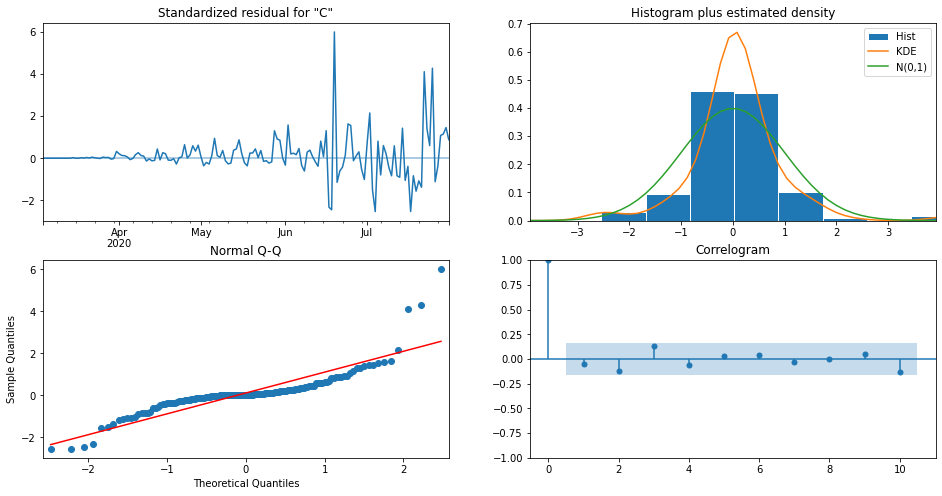

In [55]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. We want that KDE approximate to a normal distribution (This did not happen, but the extremities are not so different).

Correlogram:  It shows that it was possible to transform our data into stationed before making the fit.

# Making predictions

In [56]:
# We are using a part of the data used for the training
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ic = pred.conf_int() # Construct confidence interval for the fitted parameters.
pred_ic

,lower Casos,upper Casos
2020-07-01,284123.507841,292788.207284
2020-07-02,293087.154413,301751.851432
2020-07-03,309712.945346,318377.640253
2020-07-04,313808.499295,322473.192366
2020-07-05,314049.606101,322714.297573
2020-07-06,320494.598946,329159.289027
2020-07-07,327045.737150,335710.427069
2020-07-08,336585.438887,345250.127582
2020-07-09,346345.220462,355009.907958
2020-07-10,356625.547035,365290.233488


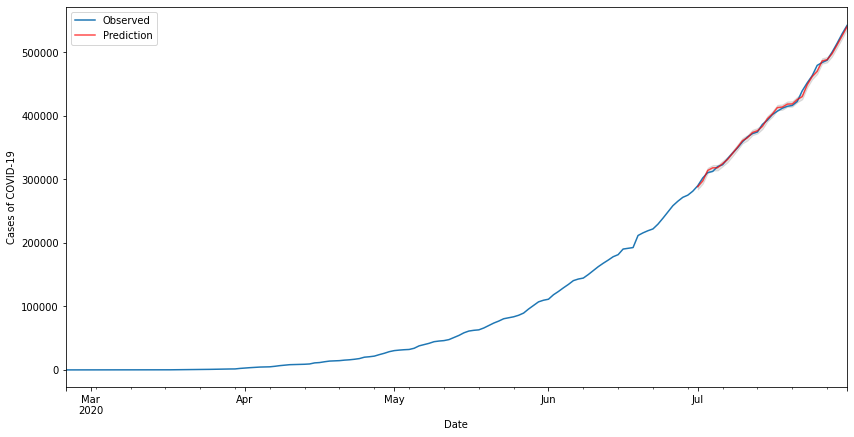

In [57]:
ax = y['2020':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Prediction', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.1) # Construct confidence interval for the fitted parameters.
ax.set_xlabel('Date')
ax.set_ylabel('Cases of COVID-19')
plt.legend()
plt.show()

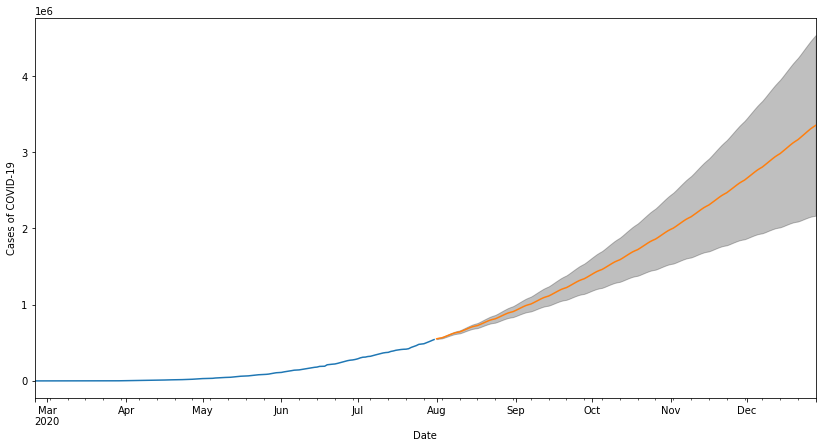

In [58]:
# Looking fo the future data
pred_uc = results.get_forecast(steps=150) # for the next 150 days
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Foreseen')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1],color='k',alpha=0.25) # Construct confidence interval for the fitted parameters.
ax.set_xlabel('Date')
ax.set_ylabel('Cases of COVID-19')
plt.show()

It is recommended to use data unseen during the training to see the results now.

# Taking extra data

In [59]:
df_att = pd.read_csv('cases-brazil-states-att.csv')
df_att = df_att[df_att['state'] == 'SP']
df_att = df_att.rename(columns = {'date':'data'})
df_att.head()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [61]:
df_att['data'] = pd.to_datetime(df_att['data']).dt.date
df_att.index = df_att['data']
df_att.tail()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2021-01-07,101,2021-01-07,Brazil,SP,TOTAL,257,47768,14073,1515158,47768,1515158,104.02654,3299.62844,0.03153,1336589.0,NaN,7025614.0,15299.99892
2021-01-08,101,2021-01-08,Brazil,SP,TOTAL,261,48029,13794,1528952,48029,1528952,104.59494,3329.66826,0.03141,1340014.0,NaN,7025614.0,15299.99892
2021-01-09,101,2021-01-09,Brazil,SP,TOTAL,269,48298,11561,1540513,48298,1540513,105.18075,3354.84518,0.03135,1350513.0,NaN,7025614.0,15299.99892
2021-01-10,102,2021-01-10,Brazil,SP,TOTAL,53,48351,5619,1546132,48351,1546132,105.29617,3367.08193,0.03127,1360789.0,NaN,7025614.0,15299.99892
2021-01-11,102,2021-01-11,Brazil,SP,TOTAL,28,48379,3010,1549142,48379,1549142,105.35715,3373.63694,0.03123,1370112.0,NaN,7025614.0,15299.99892


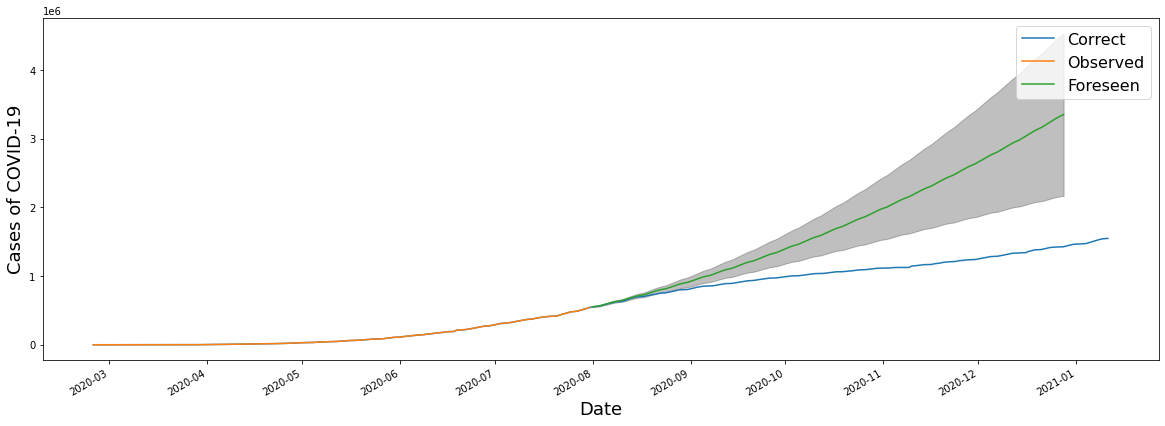

In [63]:
x = df_att['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(x,label='Correct')
ax = y.plot(label='Observed') # used to make the forecasting
pred_uc.predicted_mean.plot(ax=ax, label='Foreseen')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1], color='k',alpha=0.25)
ax.set_xlabel('Date',fontsize=18)
ax.set_ylabel('Cases of COVID-19',fontsize=18)
plt.legend(fontsize=16)